# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [4]:
#Import all the necessary modules

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [6]:
pima_df = pd.read_csv("pima-indians-diabetes.csv")

#df.info()

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [7]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [9]:
print("Dtypes:\n",pima_df.dtypes)
print("\nShape:\n",pima_df.shape)

Dtypes:
 Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

Shape:
 (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [10]:
#Display all medians
print("Median Values:\n",pima_df.median())

#Replace zeros with columns median
pima_df.replace(to_replace = 0, value =pima_df.median())


Median Values:
 Preg       3.0000
Plas     117.0000
Pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [12]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

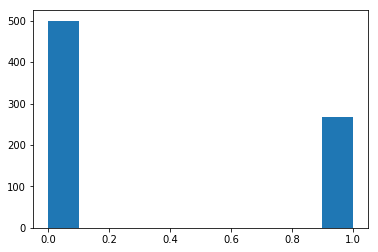

In [35]:
plt.hist(pima_df['class'])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [0]:
#If 1 - Diabetes, 0 - No Diabetes then approx 250 people have Diabetes

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

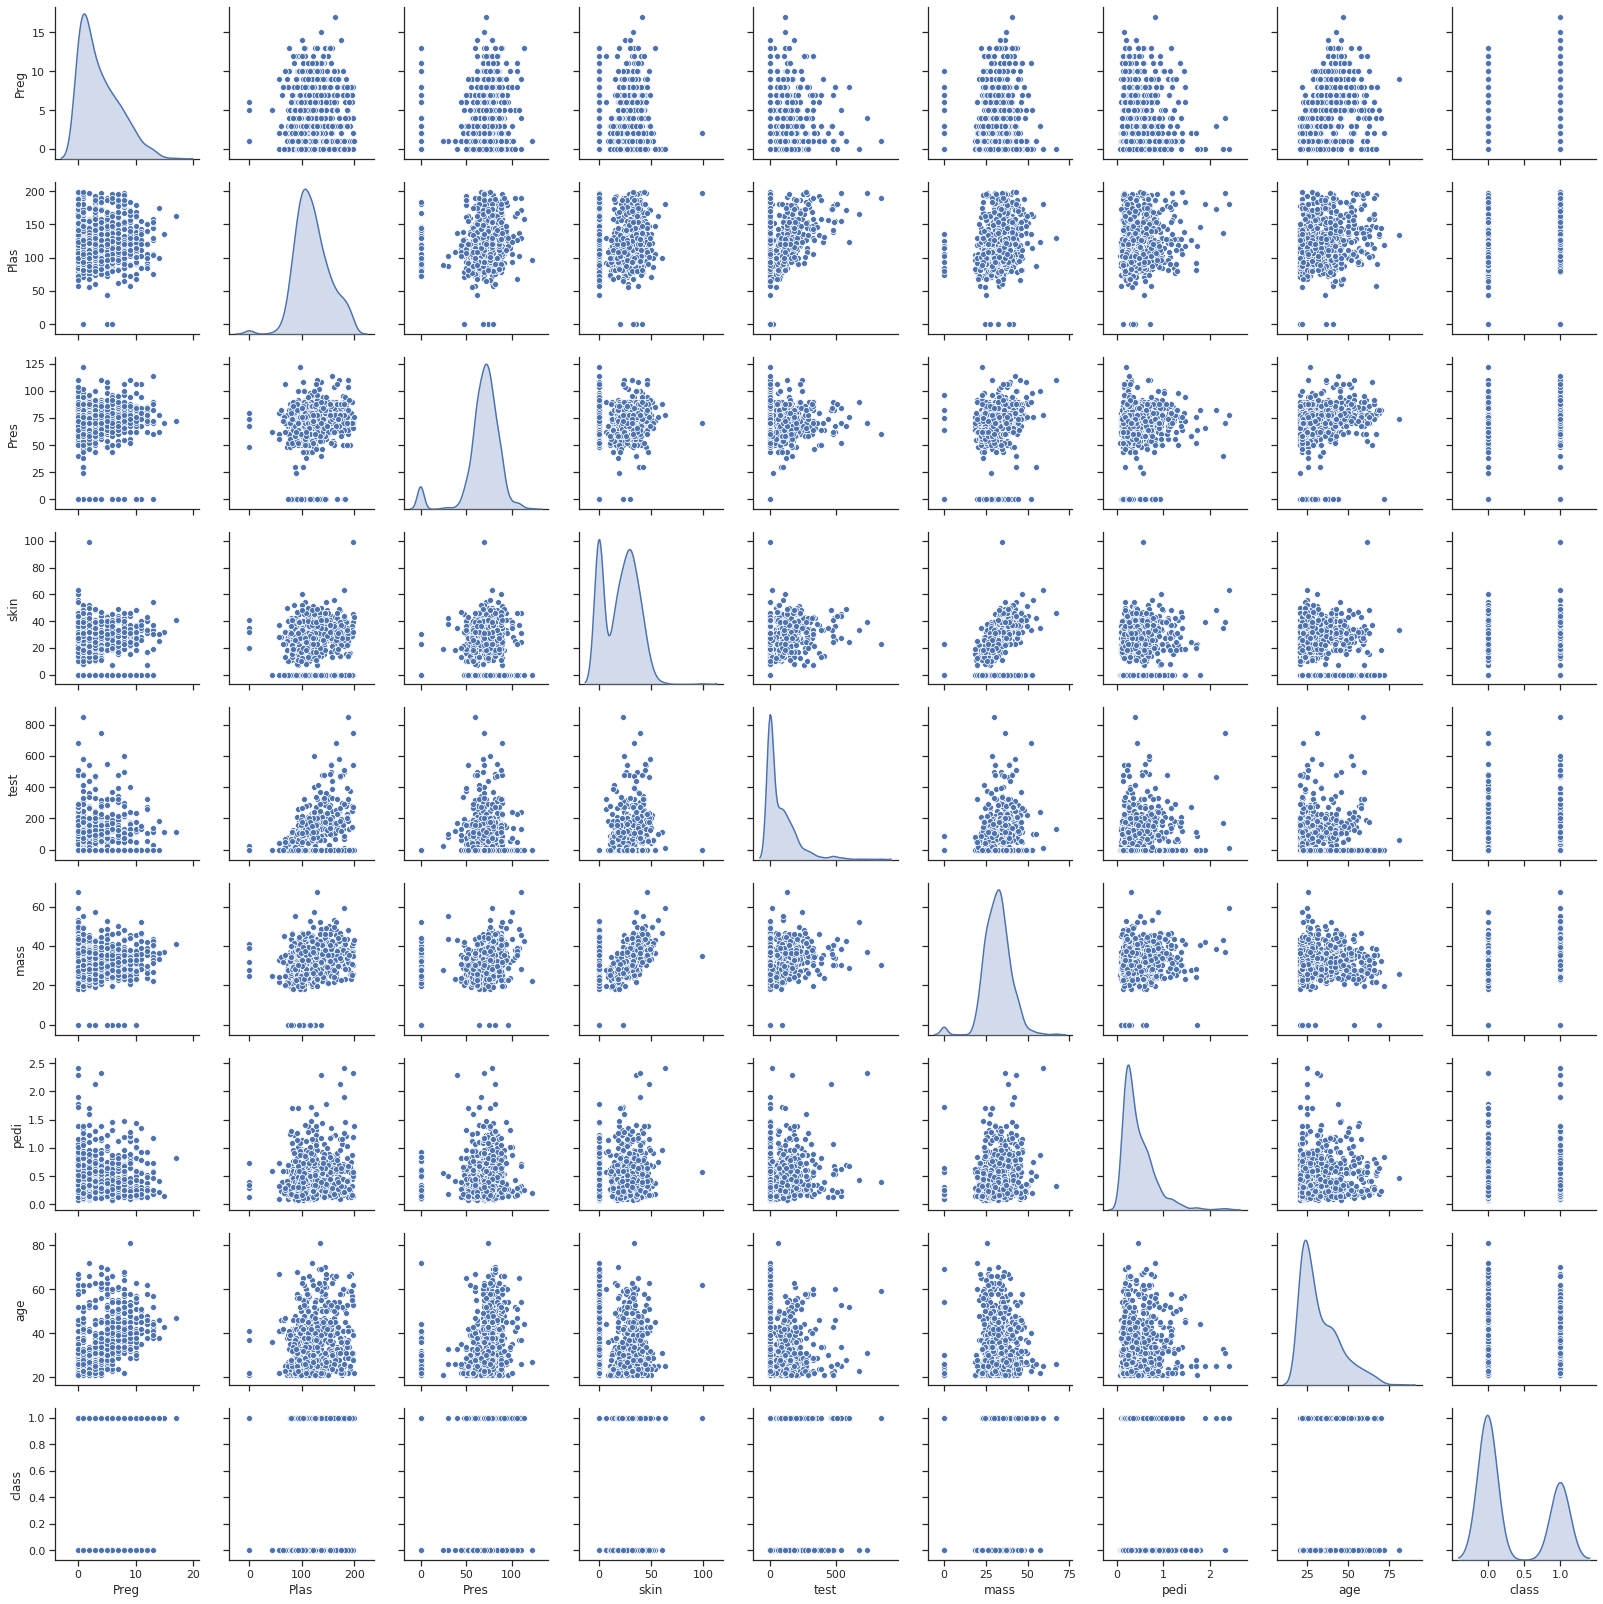

In [54]:
# Pairplot using sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(pima_df, diag_kind='kde')

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [55]:
pima_df=df
from sklearn.model_selection import train_test_split
X = pima_df.drop(["class"], axis=1)
y = pima_df[["class"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [69]:


dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
test_pred = dt_model.predict(X_test)
y_grid = (np.column_stack([test_pred, y_test]))

# Q10 Print the accuracy of the model & print the confusion matrix 

In [73]:
dt_model.score(X_train , y_train)

0.8072916666666666

In [74]:
dt_model.score(X_test , y_test)

0.6875

In [82]:
from sklearn.metrics import confusion_matrix
predicted = dt_model.predict(X_test)
confusion_matrix(y_test,predicted)

array([[94, 28],
       [32, 38]])

Print the feature importance of the decision model - Optional

In [84]:
dt_model.feature_importances_

array([0.03341618, 0.38252181, 0.07012718, 0.01773889, 0.01808162,
       0.25563518, 0.07675818, 0.14572095])